### 1.) Linear SVC in case of linear separation

- load the Wine dataset (can be found in sklearn API) (sklearn.datasets.load_wine)
- scale the data and plot the flavanoids vs hue in a scatterplot colored with the target, where the target should be class_0 and class_2, so class_1 left out
- train an SVC model with linear kernel with default parameter settings, but once with C=0.1 and then C=1000
- visualize the model's decision boundary and the margins based on the coefficients learnt by the model
- interpret the results, what is the role of the C hyperparameter?


### 2.) Linear SVC but non-linear separation

- create a dataset with the following: X, y = make_circles(n_samples=100, noise=0.075, random_state=0)
- perform the same steps just as in the previous exercise and use the linear kernel for the SVC
- since linear SVC cannot do non-linear separation, you will need to do some workaround, for example adding polynomial features (find the simpest combination for this dataset)
- write down with your own words in few sentences how the support vector machine works 

      * Here are some hints:
        -use PolynomialFeatures on the two input features, if you omit the bias, it will be with shape (100,9)
        -scale the input features
        -train SVC on the new, transformed data
        -visualization can be made in the original feature space, so (x1, x2), for this:
            -create a meshgrid on the original feature space that will be used for visualization
            -transform this grid to the space where you have the new, transformed data (use the same PolynomialFeatures() function)
            -scale this too, since you already scaled the features
            -get the coefs from SVC (w) and perform z=w*x+b, store this for every grid points
            -after reshaping arrays you should be able to get this z on the original (x1, x2) and you are able to do for example a contourplot with levels showing -1, 1 margins and the z=0. 

      * Other possible solution is made by the built in decision function of the SVM, but this also needs the transformed grid that is made for visualization.

      *  In addition, there is another solution with the use of kernel poly in SVC, but then you need to set degree=3. A meshgrid for visualization is needed here, too. At every grid points you can get a prediction that will act as the variable z in the previous solution.

### 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings

- you need to build a classifier that predicts the wine quality. It is based on a score from 0-10, but you need to split it into two classes with the treshold 6.5. Values below should be 0, above 1.

- data can be downloaded from this site: https://archive.ics.uci.edu/ml/datasets/Wine+Quality (csv file also attached). Use the winequality-white.csv for this time.

- train the SVM classifier (SVC in sklearn API) on every second sample (not first 50% of the data (!), use every second line) and generate (probabilistic) prediction for the samples that were not used during the training

- build default SVC, but set it to predict probabilities

- plot the ROC curve and calculate the confusion matrix for the predictions

- how good is the performance of the model? What are your experiences?


### 4.) Scale data and try different kernels

- scale your data before applying the SVC model
- plot the ROC curve and calculate the confusion matrix for the predictions
- do your model perform better or worse after scaling? 
- try out other kernels (linear, poly) and evaluate the performance of the model the same way

### 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters

- prepare data as described in the title, then scale all input based on the training set (IMPORTANT: you can use ONLY the training data for scaling, otherwise the model will be fake (!) and we cannot give you points)
- select your best performing SVC model from the previous exercise
- check the behaviour of the SVC by modifying at least 3 of its hyperparameters (C, gamma, ...) and plot the AUC value vs the modified parameter (logscale may be better for visualization)
- create plots (at least 2) that shows the train, val and test accuracy based on a given hyperparameter's different values. Is it a good idea to rely on validation data when tuning hyperparameter in this case?

In [2]:
# importing useful packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm 
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import statsmodels.formula.api as sm

### 1.)

In [3]:
wine = datasets.load_wine()
X = wine['data']

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'])
corr = data.corr()
data['target'] = wine['target']
data = data[ data['target'] !=1 ] # we will only focus on class 0 and class 2
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


In [4]:
corr.style.background_gradient(cmap='coolwarm')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Text(12.299999999999997, 0.5, 'Hue (scaled)')

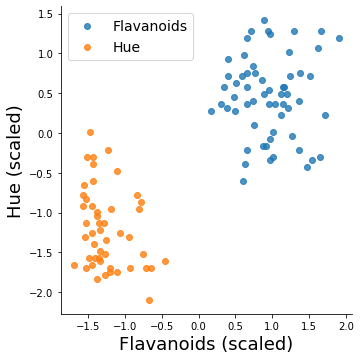

In [5]:
sns.lmplot(x='flavanoids',y='hue', hue='target', data=data, fit_reg=False, legend=False)
plt.legend(['Flavanoids','Hue'], fontsize = 14)
plt.xlabel('Flavanoids (scaled)', fontsize = 18)
plt.ylabel('Hue (scaled)', fontsize = 18)

In [6]:
svc = svm.SVC(kernel='linear', C=0.1 )
svc.fit(data[['flavanoids','hue']].values, data['target'].values)

SVC(C=0.1, kernel='linear')

In [7]:
# get the parameters
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-2.5, 2.5, num=100)
# decision boundary
x1_decision = -b/w1 - w0/w1*x0
# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin 
x1_minus = x1_decision - 1/w1

(-2.5, 2.5)

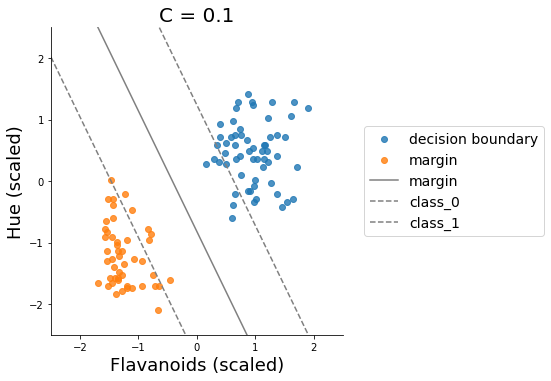

In [8]:
sns.lmplot(x='flavanoids',y='hue',hue='target', data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','class_0','class_1'], 
            fontsize = 14, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.xlabel('Flavanoids (scaled)', fontsize = 18)
plt.ylabel('Hue (scaled)', fontsize = 18)
plt.title('C = 0.1', fontsize = 20)
plt.ylim(-2.5,2.5)
plt.xlim(-2.5,2.5)

In [9]:
svc = svm.SVC(kernel='linear', C=1000 ) # let's change C to a much larger value
svc.fit(data[['flavanoids','hue']].values,data['target'].values)

# get the parameters
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-2.5, 2.5, num=100)
# decision boundary
x1_decision = -b/w1 - w0/w1*x0
# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin 
x1_minus = x1_decision - 1/w1

(-2.5, 2.5)

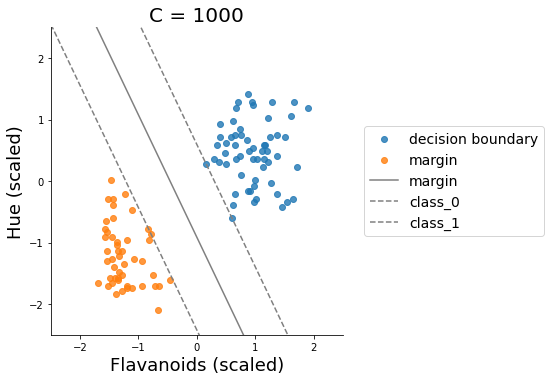

In [10]:
sns.lmplot(x='flavanoids',y='hue',hue='target', data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','class_0','class_1'], 
            fontsize = 14, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.xlabel('Flavanoids (scaled)', fontsize = 18)
plt.ylabel('Hue (scaled)', fontsize = 18)
plt.title('C = 1000', fontsize = 20)
plt.ylim(-2.5,2.5)
plt.xlim(-2.5,2.5)

### 2.)

In [11]:
from sklearn.datasets import make_moons, make_circles

In [12]:
X, y = make_circles(n_samples=100, noise=0.075, random_state=0) # fix random_state to make sure it produces the same dataset everytime. Remove it if you want randomized dataset.
data = pd.DataFrame(data = X, columns=['x1','x2'])
data['y']=y
data.head()

,x1,x2,y
0,-0.960210,-0.127431,0
1,-0.039206,-0.737321,1
2,0.941258,0.197782,0
3,0.620692,0.414672,1
4,-0.850627,-0.009959,1


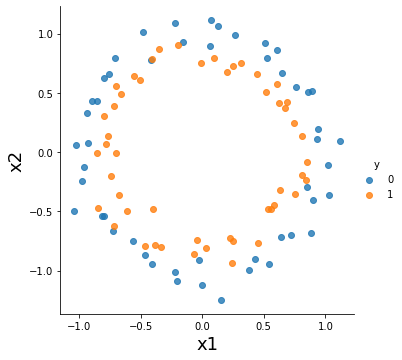

In [13]:
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True )
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

In [14]:
# tranform the features, here we use a 2rd degree polynomials
print('Shape of X before tranformation:', X.shape)
poly = PolynomialFeatures(degree = 2, include_bias=False)
Xpoly = poly.fit_transform(X)
print('Shape of X after tranformation:', Xpoly.shape)

Shape of X before tranformation: (100, 2)
Shape of X after tranformation: (100, 5)


In [15]:
# standardize the data
scaler = StandardScaler()
Xpoly_scaled = scaler.fit_transform(Xpoly)

In [16]:
svm_clf = svm.SVC(kernel='linear', C=0.1)
svm_clf.fit(Xpoly_scaled,y)
print(svm_clf.intercept_, svm_clf.coef_)

[-0.00154106] [[-1.21020059e-02 -9.74249473e-04 -1.29538220e+00 -7.97913787e-02
  -1.31955267e+00]]


In [17]:
# preparing to plot decision boundary of the classifier
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [18]:
# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# polynomial transformation and standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridpoly = poly.transform(xgrid)
xgridpoly_scaled = scaler.transform(xgridpoly)
# prediction
Z = xgridpoly_scaled.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wx + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

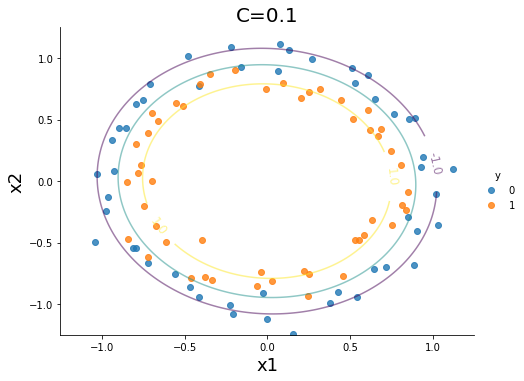

In [19]:
# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1,levels=[-1.0,0,1.0], fmt='%1.1f', fontsize=12, manual=[(1.5,0.3),(0.5,0.0),(-0.5,-0.2)])
#
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.title('C=0.1', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

Text(25.74816406250001, 0.5, 'x2')

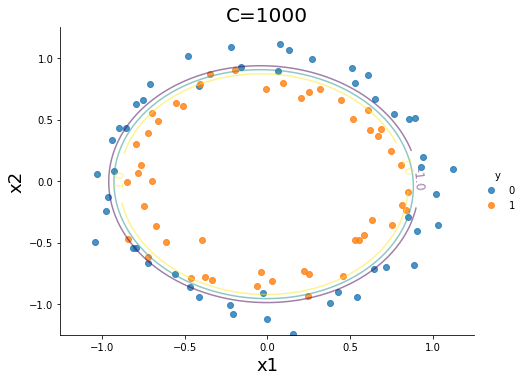

In [20]:
svm_clf = svm.SVC(kernel='linear', C=1000)
svm_clf.fit(Xpoly_scaled,y)

# prediction
Z = xgridpoly_scaled.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wx + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1,levels=[-1.0,0,1.0], fmt='%1.1f', fontsize=12, manual=[(1.5,0.1),(0.5,0.0),(-0.5,0.0)])
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.title('C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)

### 3.)

Source: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [21]:
wine_df = pd.read_csv( 'winequality-white.csv', delimiter=';' )
wine_df.shape

(4898, 12)

In [22]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
np.where( np.isnan(wine_df) )

(array([], dtype=int64), array([], dtype=int64))

In [24]:
X = wine_df.values[:,:-1]
y = np.ones( wine_df.shape[0] ) * ( wine_df.quality.values > 6.5 )

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [25]:
X[:5], y[:5]

(array([[7.000e+00, 2.700e-01, 3.600e-01, 2.070e+01, 4.500e-02, 4.500e+01,
         1.700e+02, 1.001e+00, 3.000e+00, 4.500e-01, 8.800e+00],
        [6.300e+00, 3.000e-01, 3.400e-01, 1.600e+00, 4.900e-02, 1.400e+01,
         1.320e+02, 9.940e-01, 3.300e+00, 4.900e-01, 9.500e+00],
        [8.100e+00, 2.800e-01, 4.000e-01, 6.900e+00, 5.000e-02, 3.000e+01,
         9.700e+01, 9.951e-01, 3.260e+00, 4.400e-01, 1.010e+01],
        [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
         1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00],
        [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
         1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00]]),
 array([0., 0., 0., 0., 0.]))

In [26]:
y_train = y[::2]
y_test = y[1::2]

x_train = X[::2]
x_test = X[1::2]

In [27]:
SVC_model = svm.SVC( probability=True )
SVC_model.fit(x_train, y_train) # training
predictions = SVC_model.predict_proba(x_test) # predicting  probabilities
pred_labels = SVC_model.predict(x_test) # predicting labels

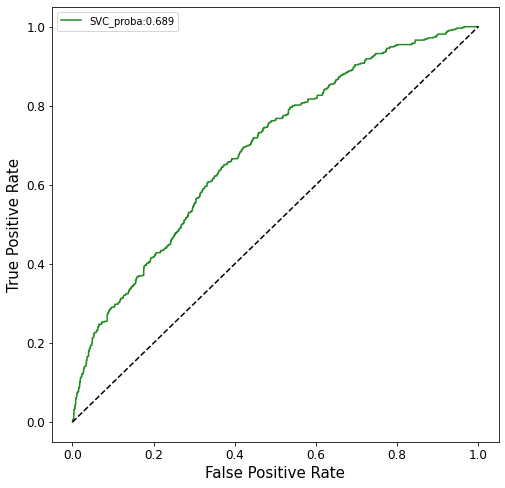

In [28]:
# calculting the false positive and false negative rate:
fpr_mine, tpr_mine, _ = metrics.roc_curve( y_test, predictions[:,1] )
auc_mine = np.round(metrics.roc_auc_score( y_test, predictions[:,1] ), 3 )

# plotting:
plt.figure(figsize=(8, 8))
plt.plot( fpr_mine, tpr_mine, color = 'forestgreen',
         label = 'SVC_proba:' + str(auc_mine) )
plt.plot([0, 1], [0, 1], '--', c='k')
plt.xticks( fontsize = 12 )
plt.yticks( fontsize = 12 )
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend()

Predicted type   0.0
Real type           
0.0             1919
1.0              530


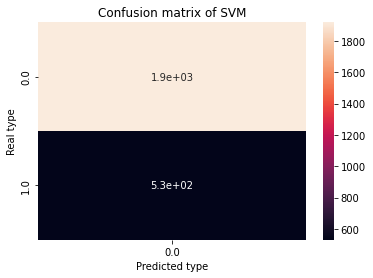

In [29]:
# calculating the confusion matrix
confusion_matrix = pd.crosstab( y_test, pred_labels,
                               rownames=['Real type'], colnames=['Predicted type'] )
print( confusion_matrix )

# visualizng it on a heatmap
plt.title( 'Confusion matrix of SVM')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

### 4.)

In [30]:
y_train = y[::2]
y_test = y[1::2]

x_train_scaled = X_scaled[::2]
x_test_scaled = X_scaled[1::2]

In [31]:
SVC_model = svm.SVC( probability=True )
SVC_model.fit(x_train_scaled, y_train) # training
predictions = SVC_model.predict_proba(x_test_scaled) # predicting  probabilities
pred_labels = SVC_model.predict(x_test_scaled) # predicting labels

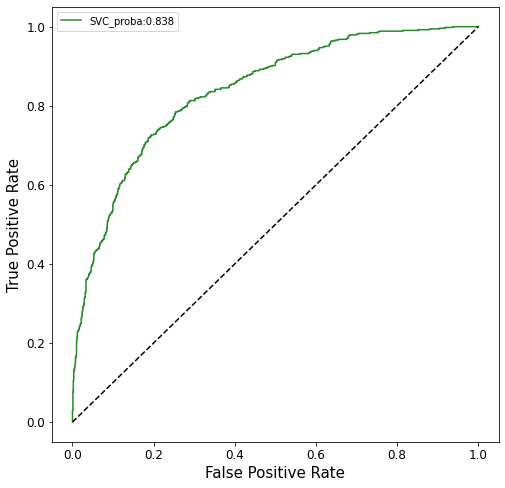

In [32]:
# calculting the false positive and false negative rate:
fpr_mine, tpr_mine, _ = metrics.roc_curve( y_test, predictions[:,1] )
auc_mine = np.round(metrics.roc_auc_score( y_test, predictions[:,1] ), 3 )

# plotting:
plt.figure(figsize=(8, 8))
plt.plot( fpr_mine, tpr_mine, color = 'forestgreen',
         label = 'SVC_proba:' + str(auc_mine) )
plt.plot([0, 1], [0, 1], '--', c='k')
plt.xticks( fontsize = 12 )
plt.yticks( fontsize = 12 )
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend()

Predicted type   0.0  1.0
Real type                
0.0             1867   52
1.0              375  155


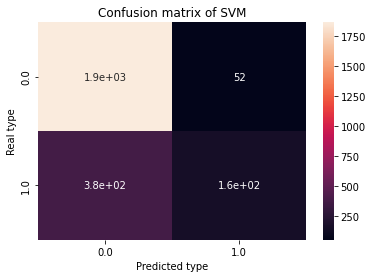

In [33]:
# calculating the confusion matrix
confusion_matrix = pd.crosstab( y_test, pred_labels,
                               rownames=['Real type'], colnames=['Predicted type'] )
print( confusion_matrix )

# visualizng it on a heatmap
plt.title( 'Confusion matrix of SVM')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Predicted type   0.0
Real type           
0.0             1919
1.0              530


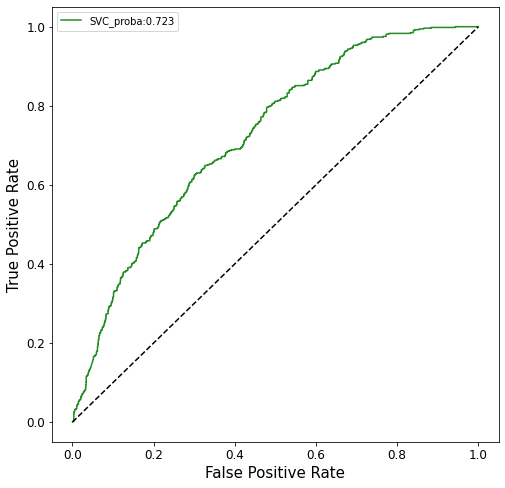

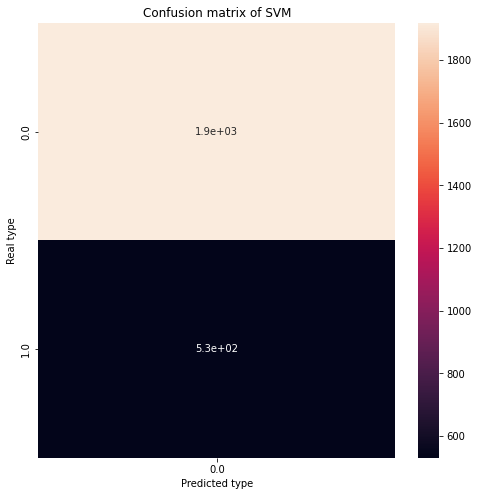

In [34]:
SVC_model = svm.SVC( kernel='linear', probability=True )
SVC_model.fit(x_train_scaled, y_train) # training
predictions = SVC_model.predict_proba(x_test_scaled) # predicting  probabilities
pred_labels = SVC_model.predict(x_test_scaled) # predicting labels

# calculting the false positive and false negative rate:
fpr_mine, tpr_mine, _ = metrics.roc_curve( y_test, predictions[:,1] )
auc_mine = np.round(metrics.roc_auc_score( y_test, predictions[:,1] ), 3 )

# plotting:
plt.figure(figsize=(8, 8))
plt.plot( fpr_mine, tpr_mine, color = 'forestgreen',
         label = 'SVC_proba:' + str(auc_mine) )
plt.plot([0, 1], [0, 1], '--', c='k')
plt.xticks( fontsize = 12 )
plt.yticks( fontsize = 12 )
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend()

# calculating the confusion matrix
confusion_matrix = pd.crosstab( y_test, pred_labels,
                               rownames=['Real type'], colnames=['Predicted type'] )
print( confusion_matrix )

# visualizng it on a heatmap
plt.figure(figsize=(8, 8))
plt.title( 'Confusion matrix of SVM')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Predicted type   0.0  1.0
Real type                
0.0             1889   30
1.0              452   78


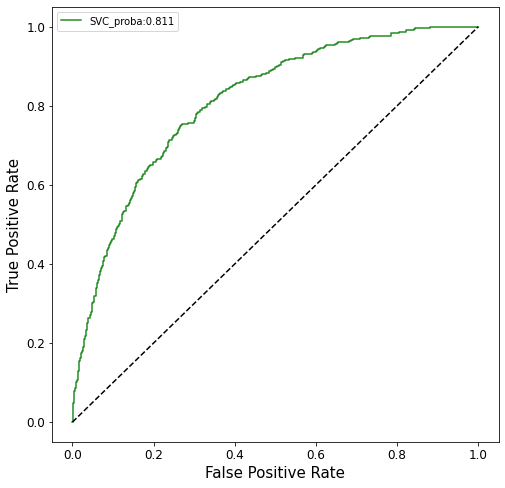

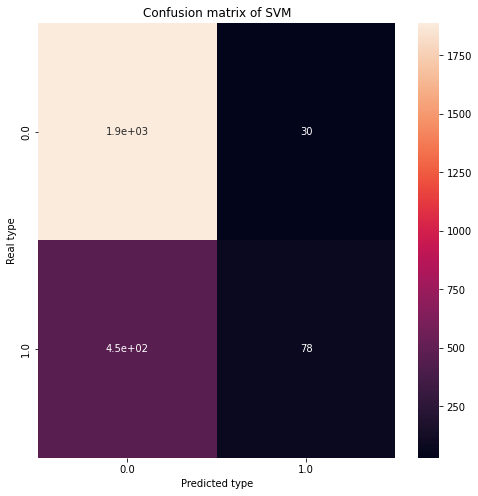

In [35]:
SVC_model = svm.SVC( kernel='poly', probability=True )
SVC_model.fit(x_train_scaled, y_train) # training
predictions = SVC_model.predict_proba(x_test_scaled) # predicting  probabilities
pred_labels = SVC_model.predict(x_test_scaled) # predicting labels

# calculting the false positive and false negative rate:
fpr_mine, tpr_mine, _ = metrics.roc_curve( y_test, predictions[:,1] )
auc_mine = np.round(metrics.roc_auc_score( y_test, predictions[:,1] ), 3 )

# plotting:
plt.figure(figsize=(8, 8))
plt.plot( fpr_mine, tpr_mine, color = 'forestgreen',
         label = 'SVC_proba:' + str(auc_mine) )
plt.plot([0, 1], [0, 1], '--', c='k')
plt.xticks( fontsize = 12 )
plt.yticks( fontsize = 12 )
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend()

# calculating the confusion matrix
confusion_matrix = pd.crosstab( y_test, pred_labels,
                               rownames=['Real type'], colnames=['Predicted type'] )
print( confusion_matrix )

# visualizng it on a heatmap
plt.figure(figsize=(8, 8))
plt.title( 'Confusion matrix of SVM')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Predicted type   0.0  1.0
Real type                
0.0             1604  315
1.0              342  188


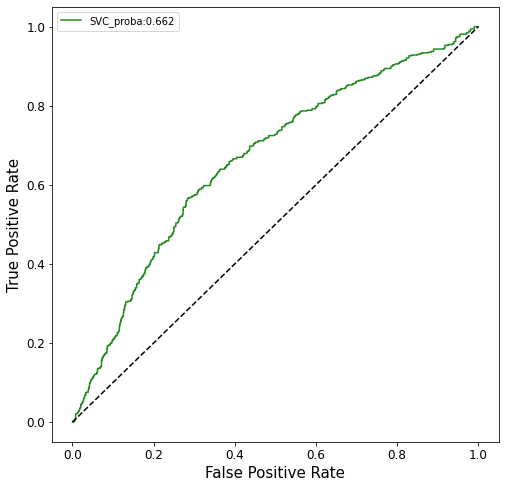

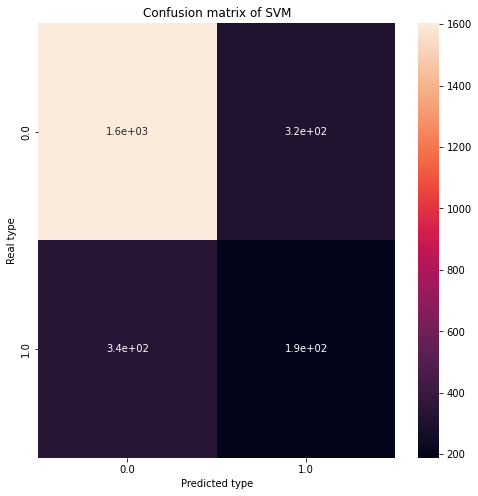

In [36]:
SVC_model = svm.SVC( kernel='sigmoid', probability=True )
SVC_model.fit(x_train_scaled, y_train) # training
predictions = SVC_model.predict_proba(x_test_scaled) # predicting  probabilities
pred_labels = SVC_model.predict(x_test_scaled) # predicting labels

# calculting the false positive and false negative rate:
fpr_mine, tpr_mine, _ = metrics.roc_curve( y_test, predictions[:,1] )
auc_mine = np.round(metrics.roc_auc_score( y_test, predictions[:,1] ), 3 )

# plotting:
plt.figure(figsize=(8, 8))
plt.plot( fpr_mine, tpr_mine, color = 'forestgreen',
         label = 'SVC_proba:' + str(auc_mine) )
plt.plot([0, 1], [0, 1], '--', c='k')
plt.xticks( fontsize = 12 )
plt.yticks( fontsize = 12 )
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend()

# calculating the confusion matrix
confusion_matrix = pd.crosstab( y_test, pred_labels,
                               rownames=['Real type'], colnames=['Predicted type'] )
print( confusion_matrix )

# visualizng it on a heatmap
plt.figure(figsize=(8, 8))
plt.title( 'Confusion matrix of SVM')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

### 5.)

In [37]:
np.random.seed(0)
rand_idx = np.random.permutation(y.shape[0])
data_rand = X[ rand_idx ]
target_rand = y[ rand_idx ]

In [38]:
N = data_rand.shape[0]
n1 = int(N*0.15)
n2 = int(N*0.30)

testidx = np.arange( 0, n1 ) # getting indices of the selected fraction for the test data
validx = np.arange( n1, n2 ) # getting indices of the selected fraction for the test data
trainidx = np.arange( n2, N)
testidx[-3:], validx[:3], validx[-3:], trainidx[:3]

(array([731, 732, 733]),
 array([734, 735, 736]),
 array([1466, 1467, 1468]),
 array([1469, 1470, 1471]))

In [39]:
x_test = data_rand[testidx]
x_val = data_rand[validx]
x_train = data_rand[trainidx]
y_test = target_rand[testidx]
y_val = target_rand[validx]
y_train = target_rand[trainidx]
x_test.shape, x_val.shape, x_train.shape, y_test.shape, y_val.shape, y_train.shape

((734, 11), (735, 11), (3429, 11), (734,), (735,), (3429,))

In [40]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform( x_train )
x_test_sc = scaler.transform( x_test )
x_val_sc = scaler.fit_transform( x_val )

In [41]:
def SVM_model_predict_tune( x_train, x_test, y_train, y_test, kernel='poly', 
                           gamma='auto', C=1.0, cache_size=200, random_state=None, 
                           tol=0.001, coef0=0.0 ):
    clf = svm.SVC( gamma=gamma, C=C, kernel=kernel, probability=True, 
                  cache_size=cache_size, random_state=random_state, tol=tol, coef0=coef0 )
    clf.fit( x_train, y_train )

    y_pred = clf.predict_proba( x_test )

    fpr, tpr, thresholds = metrics.roc_curve( y_test, y_pred[:,1] )
    auc = metrics.auc( fpr, tpr )
    
    return auc

#### Gamma

CPU times: user 18.8 s, sys: 93.7 ms, total: 18.9 s
Wall time: 18.9 s


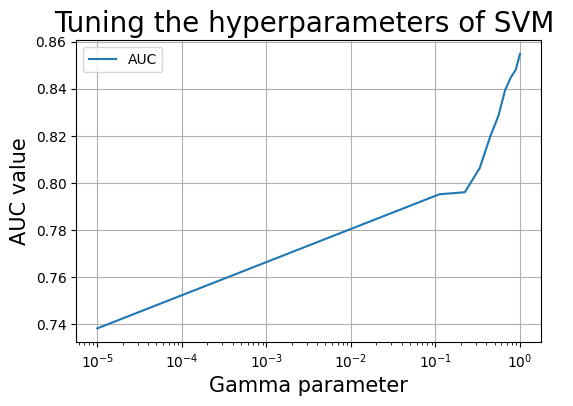

In [42]:
%%time
gammas = np.linspace( 1e-5, 1, 10 )
auc_tune = np.empty( gammas.shape[0], dtype=float )
for i in range(gammas.shape[0]):
    auc_tune[i] = SVM_model_predict_tune( x_train_sc, x_val_sc, y_train, y_val, kernel='rbf', gamma=gammas[i] )
gamma_best = gammas[ np.argmax( auc_tune, axis=0 ) ]

fig = plt.figure( figsize=(6,4), dpi=100 )
plt.title( 'Tuning the hyperparameters of SVM ', fontsize=20)
plt.plot( gammas, auc_tune, label='AUC' )
plt.ylabel( 'AUC value', fontsize = 15)
plt.xlabel( 'Gamma parameter', fontsize = 15)
plt.xscale( 'log' )
plt.grid()
plt.legend()

In [43]:
gamma_best

1.0

In [44]:
gamma_best = 1.0

#### C

CPU times: user 24.1 s, sys: 107 ms, total: 24.2 s
Wall time: 24.2 s


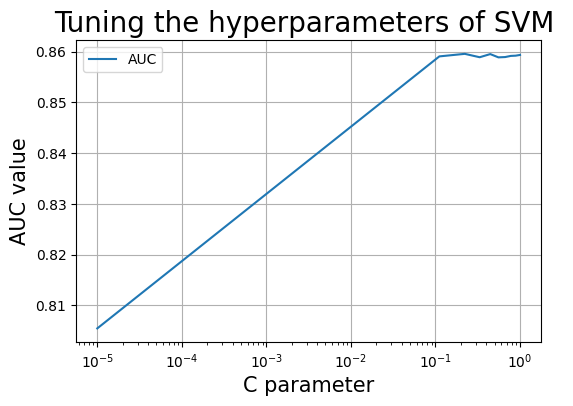

In [45]:
%%time
Cs = np.linspace( 1e-5, 1000, 10 )
auc_tune = np.empty( Cs.shape[0], dtype=float )
for i in range(Cs.shape[0]):
    auc_tune[i] = SVM_model_predict_tune( x_train_sc, x_val_sc, y_train, y_val, kernel='rbf', 
                                          C=Cs[i], gamma=gamma_best )
Cs_best = Cs[ np.argmax( auc_tune, axis=0 ) ]

fig = plt.figure( figsize=(6,4), dpi=100 )
plt.title( 'Tuning the hyperparameters of SVM ', fontsize=20)
plt.plot( gammas, auc_tune, label='AUC' )
plt.ylabel( 'AUC value', fontsize = 15)
plt.xlabel( 'C parameter', fontsize = 15)
plt.xscale( 'log' )
plt.grid()
plt.legend()

In [46]:
Cs_best

222.22223

In [48]:
Cs_best = 250

#### Tolerance

CPU times: user 3.7 s, sys: 68.7 ms, total: 3.77 s
Wall time: 3.77 s


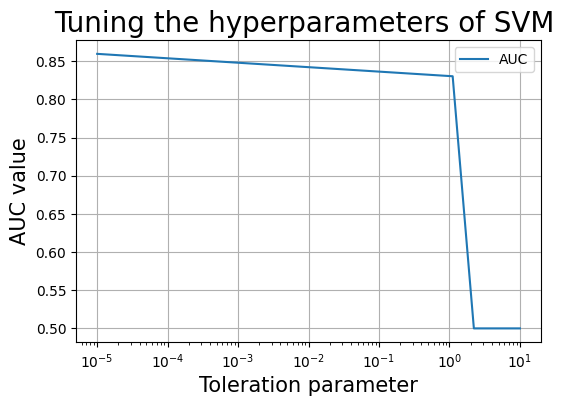

In [49]:
%%time
tols = np.linspace( 1e-5, 10, 10 )
auc_tune = np.empty( tols.shape[0], dtype=float )
for i in range(tols.shape[0]):
    auc_tune[i] = SVM_model_predict_tune( x_train_sc, x_val_sc, y_train, y_val, kernel='rbf', 
                                         gamma=gamma_best, C=Cs_best, tol=tols[i] )
tol_best = tols[ np.argmax( auc_tune, axis=0 ) ]

fig = plt.figure( figsize=(6,4), dpi=100 )
plt.title( 'Tuning the hyperparameters of SVM ', fontsize=20)
plt.plot( tols, auc_tune, label='AUC' )
plt.ylabel( 'AUC value', fontsize = 15)
plt.xlabel( 'Toleration parameter', fontsize = 15)
plt.xscale( 'log' )
plt.grid()
plt.legend()

In [50]:
tol_best

1e-05

In [51]:
tol_best = 1e-5

In [52]:
def SVM_model_predict( x_train, y_train, x_test, y_test,kernel, 
                       gamma='auto', C=1.0, tol=0.001 ):
    clf = svm.SVC( gamma=gamma, C=C, kernel=kernel, probability=True, tol=tol )
    clf.fit( x_train, y_train ) 

    predictions = clf.predict_proba( x_test )
    pred_labels = clf.predict( x_test ) # predicting labels
    
    # calculting the false positive and false negative rate:
    fpr_mine, tpr_mine, _ = metrics.roc_curve( y_test, predictions[:,1] )    
    
    auc_mine = np.round(metrics.roc_auc_score( y_test, predictions[:,1] ), 3 )

    # plotting:
    plt.figure(figsize=(8, 8))
    plt.plot( fpr_mine, tpr_mine, color = 'forestgreen',
             label = 'SVC_proba:' + str(auc_mine) )
    plt.plot([0, 1], [0, 1], '--', c='k')
    plt.xticks( fontsize = 12 )
    plt.yticks( fontsize = 12 )
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.legend()

    # calculating the confusion matrix
    confusion_matrix = pd.crosstab( y_test, pred_labels,
                                   rownames=['Real type'], colnames=['Predicted type'] )
    print( confusion_matrix )

    # visualizng it on a heatmap
    plt.figure(figsize=(8, 8))
    plt.title( 'Confusion matrix of SVM')
    sns.heatmap(confusion_matrix, annot=True)
    plt.show()

Predicted type  0.0  1.0
Real type               
0.0             535   27
1.0              77   95


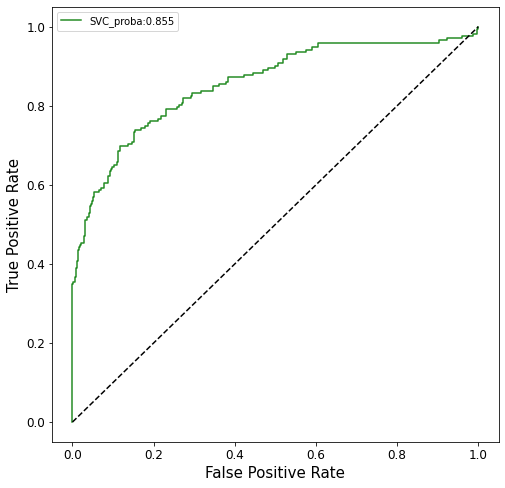

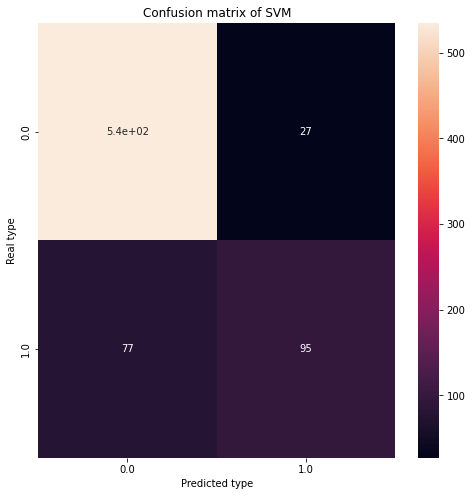

In [53]:
SVM_model_predict( x_train_sc, y_train, x_test_sc, y_test,
                   kernel='rbf', gamma=gamma_best, C=Cs_best, tol=tol_best )

Some source: 

- https://www.kaggle.com/fengdanye/machine-learning-4-support-vector-machine
- https://www.kaggle.com/pierra/credit-card-dataset-svm-classification
- https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine